In [59]:
#using Pkg
#Pkg.update()
#Pkg.add(PackageSpec(name="JWAS",rev="master"))

  Updating registry at `/opt/julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
  Updating git-repo `https://github.com/reworkhow/XSim.jl.git`
  Updating git-repo `https://github.com/reworkhow/JWAS.jl.git`
 Resolving package versions...
  Updating `/opt/julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.1/Manifest.toml`
 [no changes]
  Updating git-repo `https://github.com/reworkhow/JWAS.jl.git`
 Resolving package versions...
  Updating `/opt/julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `/opt/julia/environments/v1.1/Manifest.toml`
 [no changes]


In [61]:
Pkg.status("JWAS")

    Status `/opt/julia/environments/v1.1/Project.toml`
  [c9a035f4] JWAS v0.8.1 #master (https://github.com/reworkhow/JWAS.jl.git)


In [1]:
using DataFrames              # package for working with data sets
using JWAS                    # package for Bayesian regression analyses, including BayesB and BayesCπ        
#using JWAS:misc               # utility functions
using JWAS.Datasets
using Distributions       
using Plots                   # package for plotting 
using CSV
using LinearAlgebra,Statistics,Random,DelimitedFiles, DataFrames

In [14]:
phenotypes = CSV.read("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/production_1_7_Exp_0.75_Complete_Adj.dat", types=Dict(:ID => String), delim = ' ',header=true, missingstrings=["NA"])
first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String⍰
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [15]:
phenotypes= dropmissing(phenotypes, :NurPenBatch)
#first(phenotypes,10)

,ID,Cycle,BatchNum,Batch,Company,SowID,NurEnrich,QNurPenBatch,NurPenBatch
,String,Int64,Int64,String,String,String,String,String,String
1,0001,1,1,1B,A,1B_1715,FALSE,1B_D04,1B_D04
2,0002,1,1,1B,A,1B_1642,FALSE,1B_D04,1B_D04
3,0004,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
4,0005,1,1,1B,A,1B_1980,FALSE,1B_D04,1B_D04
5,0006,1,1,1B,A,1B_1902,FALSE,1B_D04,1B_D04
6,0007,1,1,1B,A,1B_2150,FALSE,1B_D04,1B_D04
7,0009,1,1,1B,A,1B_1902,FALSE,1B_D02,1B_D02
8,0010,1,1,1B,A,1B_1885,FALSE,1B_D02,1B_D02
9,0011,1,1,1B,A,1B_2097,FALSE,1B_D02,1B_D02


In [30]:
model_equations = "Nur2ADG = intercept + Batch + EntryAge + NurPenBatch + SowID
             Died_Adj = intercept + Batch  + EntryAge + NurPenBatch + SowID";
R= [0.141829E-01 -0.180206E-01
    -0.180206E-01 0.141034]
model=build_model(model_equations,R);
set_covariate(model,"EntryAge")
G1=[0.977466E-03 0
    0 0.977466E-03]
set_random(model,"NurPenBatch", G1)
G2=[0.916721E-03 -0.422289E-09
    -0.422289E-09 0.546526E-04]
set_random(model,"SowID",G2)

In [2]:
function readMatBin(fileName)
    genStr = open(fileName)
    n = read(genStr,Int64)
    p = read(genStr,Int64)
    M = zeros(n,p)
    for j in 1:p
        for i in 1:n
            M[i,j] = read(genStr,Float64)
        end
    end
    close(genStr)
    return M
end
@time M = readMatBin("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.gen.bin")

 18.579359 seconds (37.77 k allocations: 10.393 GiB, 0.10% gc time)


3205×435172 Array{Float64,2}:
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  2.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  0.0  1.0  1.0  0.0  1.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  1.0  2.0  0.0  1.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  2.0  2.0  0.0  2.0  2.0     0.0  2.0  1.0  2.0  2.0  2.0  2.0
 1.0  1.0  0.0  1.0  2.0  0.0  0.0  2.0  …  0.0  2.0  0.0  2.0  2.0  2.0  2.0
 0.0  2.0  0.0  0.0  2.0  0.0  0.0  2.0     0.0  2.0  0.0  2.0  2.0  2.0  2.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0

In [18]:
rowID = vec(readdlm("/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ALGP2_Cycle_1_7_Geno_Complete_Impute_JWAS.bin.ids.txt",String))

3205-element Array{String,1}:
 "0001"
 "0002"
 "0004"
 "0005"
 "0006"
 "0007"
 "0009"
 "0010"
 "0011"
 "0012"
 "0013"
 "0014"
 "0015"
 ⋮     
 "3283"
 "3284"
 "3285"
 "3286"
 "3287"
 "3288"
 "3289"
 "3290"
 "3291"
 "3292"
 "3293"
 "3294"

In [31]:
G3=[0.363417E-02  -0.291529E-02
 -0.291529E-02  0.147308E-01]
@time add_genotypes(model,M,G3,header=true, rowID=rowID, G_is_marker_variance=false) # no method matching
#@time add_genotypes(model,"Geno_JWAS_impute.txt",G3,separator=' ', G_is_marker_variance=true)

The header (marker IDs) is set to 1,2,...,#markers
435172 markers on 3205 individuals were added.
 23.862747 seconds (870.68 k allocations: 20.848 GiB, 0.45% gc time)


## Bayes CPi

In [20]:
@time outCPi=runMCMC(model,phenotypes,methods="BayesC", missing_phenotypes=true, estimatePi=true,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998), estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, output_samples_file="MCMC_BayesCPi")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
  1.1e-5  -1.7e-5
 -1.7e-5   4.4e-5



A Linear Mixed Model was build using model equations:

Nur2ADG = intercept + Batch + EntryAge + NurPenBatch + SowID
Died_Adj = intercept + Batch  + EntryAge + NurPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436
SowID           factor       random            1119

MCMC Information:

methods                                      BayesC
                              complete genomic data
                   (i.e., non-single-step analysis)
c

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = recode at recode.jl:354 [inlined]
└ @ Core /opt/julia/packages/CategoricalArrays/xjesC/src/recode.jl:354
┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = recode at recode.jl:354 [inlined]
└ @ Core /opt/julia/packages/CategoricalArrays/xjesC/src/recode.jl:354
running MCMC for BayesC...100%|█████████████████████████| Time: 1 days, 10:16:48




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


123451.054824 seconds (1.00 T allocations: 71.688 TiB, 12.00% gc time)


Dict{Any,Any} with 10 entries:
  "marker effects"          => 870344×5 DataFrame…
  "Pi"                      => 4×3 DataFrame…
  "EBV_Nur2ADG"             => 3205×3 DataFrame…
  "heritability"            => 2×3 DataFrame…
  "location parameters"     => 3214×5 DataFrame…
  "residual variance"       => 4×3 DataFrame…
  "EBV_Died_Adj"            => 3205×3 DataFrame…
  "ScaleEffectVar"          => 4×3 DataFrame…
  "genetic_variance"        => 4×3 DataFrame…
  "marker effects variance" => 4×3 DataFrame…

In [21]:
h2=CSV.read("MCMC_BayesCPi_heritability.txt",delim = ',',header=true)
insertcols!(h2, 1, :iteration => 1:500) # Add a column called iteration
first(h2, 10)

,iteration,Nur2ADG,Died_Adj
,Int64,Float64,Float64
1,1,0.93826,0.706026
2,2,0.88773,0.649005
3,3,0.803969,0.533274
4,4,0.768906,0.362314
5,5,0.710485,0.263244
6,6,0.621825,0.223476
7,7,0.523047,0.090024
8,8,0.467579,0.046273
9,9,0.357875,0.045128


In [22]:
mean(h2[!,2])

0.20573119031963133

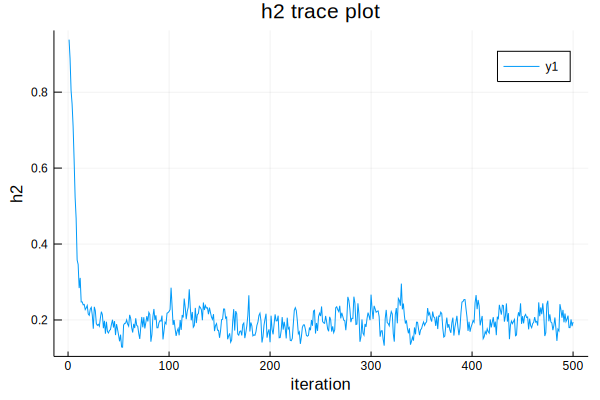

In [23]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

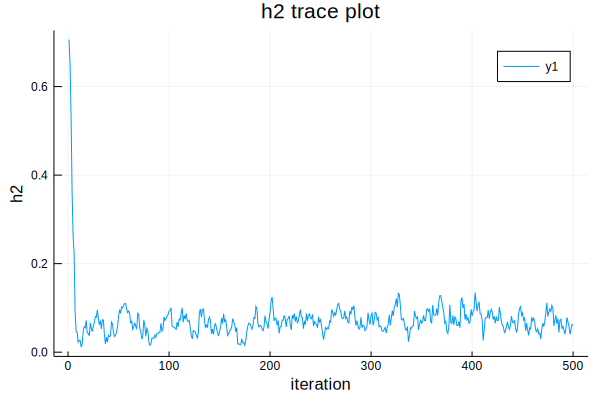

In [24]:
using Plots
x = h2[!,1]; y = h2[!,3]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [29]:
@time outCPi=runMCMC(model,phenotypes,methods="BayesC", missing_phenotypes=true, estimatePi=true,Pi=Dict([1.0; 1.0]=>0.25,[1.0; 0.0]=>0.25,[0.0; 1.0]=>0.25,[0.0; 0.0]=>0.25), estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, output_samples_file="MCMC_BayesCPi2")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
  0.0  -0.0
 -0.0   0.0



A Linear Mixed Model was build using model equations:

Nur2ADG = intercept + Batch + EntryAge + NurPenBatch + SowID
Died_Adj = intercept + Batch  + EntryAge + NurPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436
SowID           factor       random            1119

MCMC Information:

methods                                      BayesC
                              complete genomic data
                   (i.e., non-single-step analysis)
chain_length 

running MCMC for BayesC...100%|█████████████████████████| Time: 1 days, 21:22:45




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


163435.547327 seconds (1.00 T allocations: 71.706 TiB, 11.09% gc time)


Dict{Any,Any} with 10 entries:
  "marker effects"          => 870344×5 DataFrame…
  "Pi"                      => 4×3 DataFrame…
  "EBV_Nur2ADG"             => 3205×3 DataFrame…
  "heritability"            => 2×3 DataFrame…
  "location parameters"     => 3214×5 DataFrame…
  "residual variance"       => 4×3 DataFrame…
  "EBV_Died_Adj"            => 3205×3 DataFrame…
  "ScaleEffectVar"          => 4×3 DataFrame…
  "genetic_variance"        => 4×3 DataFrame…
  "marker effects variance" => 4×3 DataFrame…

## BayesB

In [32]:
@time outB=runMCMC(model,phenotypes,methods="BayesB", missing_phenotypes=true, estimatePi=false,Pi=Dict([1.0; 1.0]=>0.001,[1.0; 0.0]=>0.001,[0.0; 1.0]=>0.001,[0.0; 0.0]=>0.998), estimateScale=true,chain_length=50000,burnin = 5000,output_heritability=true, output_samples_frequency=100, output_samples_file="MCMC_BayesB")

Checking phenotypes...
Individual IDs (strings) are provided in the first column of the phenotypic data.

The prior for marker effects covariance matrix is calculated from genetic covariance matrix and Π.
The mean of the prior for the marker effects covariance matrix is:
  1.1e-5  -1.7e-5
 -1.7e-5   4.4e-5



A Linear Mixed Model was build using model equations:

Nur2ADG = intercept + Batch + EntryAge + NurPenBatch + SowID
Died_Adj = intercept + Batch  + EntryAge + NurPenBatch + SowID

Model Information:

Term            C/F          F/R            nLevels
intercept       factor       fixed                1
Batch           factor       fixed               50
EntryAge        covariate    fixed                1
NurPenBatch     factor       random             436
SowID           factor       random            1119

MCMC Information:

methods                                      BayesB
                              complete genomic data
                   (i.e., non-single-step analysis)
c

running MCMC for BayesB...100%|█████████████████████████| Time: 4 days, 2:21:53




The version of Julia and Platform in use:

Julia Version 1.1.0
Commit 80516ca202 (2019-01-21 21:24 UTC)
Platform Info:
  OS: Linux (x86_64-pc-linux-gnu)
  CPU: Intel(R) Core(TM) i7-5960X CPU @ 3.00GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-6.0.1 (ORCJIT, haswell)
Environment:
  JULIA_DEPOT_PATH = /opt/julia
  JULIA_PKGDIR = /opt/julia
  JULIA_VERSION = 1.1.0


The analysis has finished. Results are saved in the returned variable and text files. MCMC samples are saved in text files.


354144.382460 seconds (1.99 T allocations: 134.548 TiB, 29.86% gc time)


Dict{Any,Any} with 9 entries:
  "marker effects"          => 870344×5 DataFrame…
  "EBV_Nur2ADG"             => 3205×3 DataFrame…
  "heritability"            => 2×3 DataFrame…
  "location parameters"     => 3214×5 DataFrame…
  "residual variance"       => 4×3 DataFrame…
  "EBV_Died_Adj"            => 3205×3 DataFrame…
  "ScaleEffectVar"          => 4×3 DataFrame…
  "genetic_variance"        => 4×3 DataFrame…
  "marker effects variance" => 4×3 DataFrame…

In [33]:
keys(outB)

Base.KeySet for a Dict{Any,Any} with 9 entries. Keys:
  "marker effects"
  "EBV_Nur2ADG"
  "heritability"
  "location parameters"
  "residual variance"
  "EBV_Died_Adj"
  "ScaleEffectVar"
  "genetic_variance"
  "marker effects variance"

In [34]:
h2=CSV.read("MCMC_BayesB_heritability.txt",delim = ',',header=true)
insertcols!(h2, 1, :iteration => 1:500) # Add a column called iteration
first(h2, 10)

,iteration,Nur2ADG,Died_Adj
,Int64,Float64,Float64
1,1,0.207001,0.0715661
2,2,0.189458,0.0774114
3,3,0.216134,0.0857397
4,4,0.187596,0.0807523
5,5,0.198316,0.0891022
6,6,0.208986,0.0715963
7,7,0.203055,0.072353
8,8,0.20251,0.0865505
9,9,0.165877,0.0863922


In [36]:
mean(h2[!,3])

0.08799332037373954

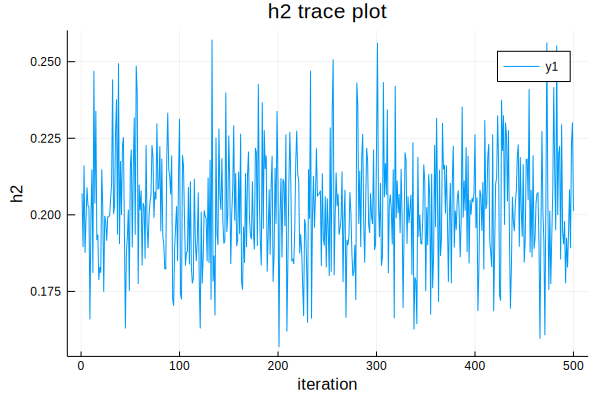

In [37]:
using Plots
x = h2[!,1]; y = h2[!,2]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

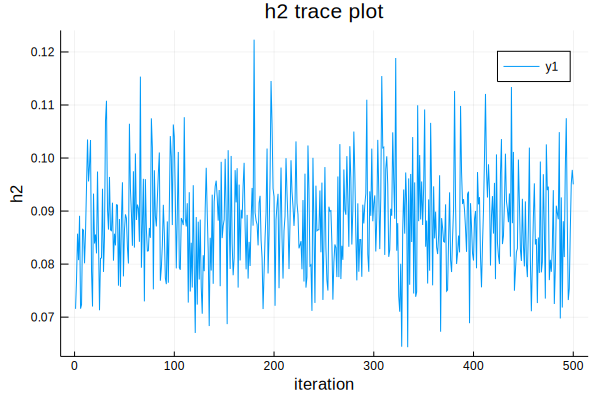

In [38]:
using Plots
x = h2[!,1]; y = h2[!,3]; # These are the plotting data
plot(x,y, title = "h2 trace plot",
        xlabel = "iteration", ylabel = "h2")

In [39]:
@time Nur2ADG_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_Nur2ADG.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",model;header=true,window_size="1 Mb",threshold=0.001,output_winVarProps=true)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.


Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


1859.564748 seconds (688.73 M allocations: 5.126 TiB, 42.64% gc time)


(2398×10 DataFrame. Omitted printing of 4 columns
│ Row  │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │
│      │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │
├──────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┤
│ 1    │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │
│ 2    │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │
│ 3    │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │
│ 4    │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │
│ 5    │ 985    │ 7      │ 17000000  │ 18000000  │ 17002783  │ 17979755  │
│ 6    │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │
│ 7    │ 578    │ 4      │ 17000000  │ 18000000  │ 17002855  │ 17998425  │
│ 8    │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │
│ 9    │ 1226   │ 8      │ 136000000 │ 137000000 │ 136000761 │ 136997320 │
│ 10   │ 2210   │ 17     │ 57000000  │ 58000000  │

In [48]:
@time Died_Adj_outB,winVarProps = GWAS("MCMC_BayesB_marker_effects_Died_Adj.txt","/home/jovyan/mark/JWAS_CDPQ/CDPQ_all_data/ChrInfo_map_1_7_Complete_JWAS.txt",model;header=true,window_size="1 Mb",threshold=0.001,output_winVarProps=true)

Compute the posterior probability of association of the genomic window that explains more than 0.001 of the total genetic variance.
1881.234697 seconds (680.44 M allocations: 5.126 TiB, 43.97% gc time)


(2398×10 DataFrame. Omitted printing of 4 columns
│ Row  │ window │ chr    │ wStart    │ wEnd      │ start_SNP │ end_SNP   │
│      │ Int64  │ String │ Int64     │ Int64     │ Int64     │ Int64     │
├──────┼────────┼────────┼───────────┼───────────┼───────────┼───────────┤
│ 1    │ 990    │ 7      │ 22000000  │ 23000000  │ 22003711  │ 22970603  │
│ 2    │ 991    │ 7      │ 23000000  │ 24000000  │ 23001142  │ 23999710  │
│ 3    │ 2206   │ 17     │ 53000000  │ 54000000  │ 53004264  │ 53999484  │
│ 4    │ 8      │ 1      │ 7000000   │ 8000000   │ 7002079   │ 7994976   │
│ 5    │ 556    │ 3      │ 128000000 │ 129000000 │ 128003120 │ 128997476 │
│ 6    │ 557    │ 3      │ 129000000 │ 130000000 │ 129000890 │ 129998184 │
│ 7    │ 1731   │ 13     │ 150000000 │ 151000000 │ 150107858 │ 150888759 │
│ 8    │ 1254   │ 9      │ 25000000  │ 26000000  │ 25000259  │ 25998536  │
│ 9    │ 864    │ 6      │ 67000000  │ 68000000  │ 67008777  │ 67983431  │
│ 10   │ 1226   │ 8      │ 136000000 │ 137000000 │

In [41]:
sort(Nur2ADG_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,991,7,23000000,24000000,23001142,23999710,243,7.76,0.974
2,990,7,22000000,23000000,22003711,22970603,188,5.65,0.928
3,2206,17,53000000,54000000,53004264,53999484,254,2.27,0.818
4,556,3,128000000,129000000,128003120,128997476,230,0.77,0.538
5,557,3,129000000,130000000,129000890,129998184,225,0.47,0.41
6,992,7,24000000,25000000,24003441,24993022,142,0.42,0.27
7,578,4,17000000,18000000,17002855,17998425,215,0.4,0.41
8,985,7,17000000,18000000,17002783,17979755,267,0.36,0.43
9,989,7,21000000,22000000,21001509,21991079,179,0.31,0.206


In [49]:
sort(Died_Adj_outB, :prGenVar, rev=true)

,window,chr,wStart,wEnd,start_SNP,end_SNP,numSNP,prGenVar,WPPA
,Int64,String,Int64,Int64,Int64,Int64,Int64,Float64,Float64
1,990,7,22000000,23000000,22003711,22970603,188,4.35,0.906
2,991,7,23000000,24000000,23001142,23999710,243,3.31,0.864
3,2206,17,53000000,54000000,53004264,53999484,254,1.01,0.628
4,8,1,7000000,8000000,7002079,7994976,224,0.88,0.422
5,556,3,128000000,129000000,128003120,128997476,230,0.52,0.412
6,1254,9,25000000,26000000,25000259,25998536,304,0.36,0.27
7,1731,13,150000000,151000000,150107858,150888759,159,0.31,0.288
8,557,3,129000000,130000000,129000890,129998184,225,0.29,0.33
9,989,7,21000000,22000000,21001509,21991079,179,0.27,0.168


In [43]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt", Nur2ADG_outB)

"MCMC_BayesB_1Mb_window_VarProps_Nur2ADG.txt"

In [54]:
CSV.write("MCMC_BayesB_1Mb_window_VarProps_Died_Adj.txt", Died_Adj_outB)

"MCMC_BayesB_1Mb_window_VarProps_Died_Adj.txt"

## BV correlation for MHC region from MCMC BayesB samples

In [7]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:501,:]

500×435172 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0          …  0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0          …  0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.000978217     0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0          …  0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 0.0  0.0  0.0  0.0  0.0  0.0             0.0  0.0  0.0  0.0          0.0
 ⋮       

In [8]:
# Get marker effects for MHC region 21 to 25mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 185429:186439]  # obtained from Map info

500×1011 Array{Float64,2}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0   0.0       
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.

In [9]:
# Get genotypes for MHC region
M_MHC= M[:,   185429:186439]
M_MHC'

1011×3205 Adjoint{Float64,Array{Float64,2}}:
 1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  …  2.0  0.0  0.0  1.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0     2.0  0.0  0.0  1.0  1.0  0.0  1.0
 1.0  2.0  1.0  1.0  1.0  2.0  1.0  1.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 1.0  2.0  1.0  1.0  2.0  2.0  1.0  1.0     2.0  2.0  2.0  2.0  2.0  2.0  2.0
 2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  …  1.0  2.0  2.0  2.0  1.0  2.0  2.0
 0.0  1.0  1.0  2.0  1.0  2.0  0.0  2.0     1.0  2.0  2.0  2.0  1.0  2.0  1.0
 2.0  2.0  1.0  2.0  1.0  2.0  2.0  2.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 2.0  2.0  2.0  2.0  1.0  2.0  2.0  2.0     1.0  2.0  2.0  1.0  2.0  2.0  1.0
 2.0  2.0  1.0  1.0  2.0  1.0  2.0  1.0  …  2.0  1.0  0.0  2.0  1.0  0.0  2.0
 1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0     1.0  0.0  0.0  0.0  1.0  0.0  0.0
 2.0  2.0  2.0  2.0

In [10]:
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'

500×3205 Array{Float64,2}:
 -0.0315864   -0.0631729    -0.0480012    …  -0.0480012   -0.0269901 
 -0.0292328   -0.0681309    -0.0759006       -0.0676205   -0.0287224 
  0.0623219    0.0454715     0.0242973        0.042372     0.0623219 
  0.0309587   -0.0111917    -0.0196598       -0.0123471    0.0103609 
  0.0458608    0.0226283    -0.000296448      0.0148108    0.0491149 
  0.0131158   -0.0517665    -0.0559774    …  -0.0406901   -0.0083866 
  0.0294345   -0.0163668    -0.032691        -0.0167182    0.0352389 
  0.00570138  -0.0277393    -0.0372831       -0.0264718    0.00570138
  0.0113244   -0.00862005   -0.0184322       -0.00862005   0.0113244 
  0.0440681    0.0159655     0.0075875        0.0231254    0.0440681 
  0.0141434   -0.0212503    -0.0367313    …  -0.0255648    0.0213959 
 -0.0239657   -0.0479314    -0.0434899       -0.0306465    0.00317826
 -0.040529    -0.0418701    -0.081058        -0.0418701   -0.0397983 
  ⋮                                       ⋱                    

In [11]:
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

500-element Array{Float64,1}:
 0.00028612953166637644
 0.0006115103219529731 
 0.000357091629025817  
 0.00043404955314178465
 0.00044655733701764685
 0.0008766988748608875 
 0.0005136270882671551 
 0.0006125180550424108 
 0.00033067960433337735
 0.0004211988847945994 
 0.0006599409190015386 
 0.00041704654514078263
 0.0002904104667672024 
 ⋮                     
 0.0005876602152686685 
 0.0004118433121191767 
 0.000354144061609031  
 0.00046973533093170233
 0.0005659644324923223 
 0.00047516757305995656
 0.0005740586522503758 
 0.000287172403006006  
 0.0004887170614516819 
 0.0006112094193237119 
 0.0004788670237069598 
 0.00036768583329216067

In [12]:
# Get var for CWT
SNP_Effect_AllMOR= readdlm("MCMC_BayesB_marker_effects_Died_Adj.txt", ',',header=false)
SNP_Effect_AllMOR= SNP_Effect_AllMOR[2:501,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllMOR_MHC= SNP_Effect_AllMOR[:,  185429:186439]
BV_AllMOR_MHC= Effect_AllMOR_MHC * M_MHC'

500×3205 Array{Float64,2}:
  0.063069     0.126138     0.0951273   …   0.0978669    0.063069  
  0.0412563    0.0626495    0.0732177       0.0653315    0.0439382 
 -0.14326     -0.146951    -0.0991055      -0.130476    -0.134887  
 -0.0849177   -0.0856236   -0.0375129      -0.0789129   -0.0849177 
 -0.0410747   -0.0014799    0.0308401       0.00526586  -0.044998  
 -0.0228822    0.0282799    0.0841632   …   0.0133006   -0.0275421 
  0.0083515    0.00488947   0.00142743      0.00417575   0.0083515 
 -0.101084    -0.101084    -0.0505419      -0.101084    -0.101084  
 -0.089939    -0.0848577   -0.0373475      -0.0848577   -0.089939  
 -0.0649245   -0.0421613   -0.00643107     -0.0364617   -0.0649245 
  0.00118623   0.0313231    0.0403613   …   0.0276052   -0.00796876
 -0.0108011   -0.0108011   -0.0267407      -0.0274246   -0.0480809 
  0.0680065    0.0748006    0.136013        0.0748006    0.0663838 
  ⋮                                     ⋱                          
  0.0663986    0.0853

In [13]:
var_AllMOR= vec(var(BV_AllMOR_MHC, dims=2)) # Get var for each iteration

500-element Array{Float64,1}:
 0.0007345317858054979 
 0.0004206861094925699 
 0.0008560043863594348 
 0.0005416468659671345 
 0.0009571475438451779 
 0.0018056587981425474 
 5.400852642389633e-6  
 0.0009294278665202263 
 0.0008455257037492947 
 0.0010680899972862227 
 0.0004732896138836627 
 0.00024977512935135405
 0.0008157324667303013 
 ⋮                     
 0.0009985952971740342 
 0.0019103220470214634 
 0.00033679544667252647
 0.0007061731437738821 
 0.002231198229142001  
 0.0012716582473156486 
 0.0010105590684390503 
 0.0005339104212937928 
 0.0009482132077203065 
 0.0013710174017262237 
 0.001930461590205781  
 0.001052662335724107  

In [14]:
coVar = Array{Float64,1}()
for i=1:500
    adg= BV_ADG_MHC[i,:]
    AllMOR= BV_AllMOR_MHC[i,:]
    covi=cov(adg, AllMOR)
    push!(coVar,covi)
end
coVar

500-element Array{Float64,1}:
 -0.00044461779761307917
 -0.00046354336017720747
 -0.0004858517462481305 
 -0.0002912776633391451 
 -0.0006415071900560944 
 -0.001041105701707058  
  7.957216355897259e-6  
 -0.00042655524375377916
 -0.0003812741680514065 
 -0.0006196300042926603 
 -0.0005525754439177566 
 -0.00023848726070982217
 -0.00048502690030657327
  ⋮                     
 -0.0006853603974160947 
 -0.0008186806389307411 
 -0.00012487825805970447
 -0.000524451606637315  
 -0.0010582680650689112 
 -0.0007194609827193052 
 -0.0006167488502763556 
 -0.000358641728772538  
 -0.0006542396585287948 
 -0.0008401674768649817 
 -0.0009400041956191805 
 -0.0005724939520451085 

In [15]:
out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllMOR => var_AllMOR)
insertcols!(out, 1, :iteration => 1:500) # Add a column called iteration

,iteration,var_AllMOR,var_ADG,covar
,Int64,Float64,Float64,Float64
1,1,0.000734532,0.00028613,-0.000444618
2,2,0.000420686,0.00061151,-0.000463543
3,3,0.000856004,0.000357092,-0.000485852
4,4,0.000541647,0.00043405,-0.000291278
5,5,0.000957148,0.000446557,-0.000641507
6,6,0.00180566,0.000876699,-0.00104111
7,7,5.40085e-6,0.000513627,7.95722e-6
8,8,0.000929428,0.000612518,-0.000426555
9,9,0.000845526,0.00033068,-0.000381274


In [16]:
# genetic correlation
Product= out[!,:var_AllMOR] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllMOR,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.96984,0.000734532,0.00028613,-0.000444618
2,2,-0.913923,0.000420686,0.00061151,-0.000463543
3,3,-0.878771,0.000856004,0.000357092,-0.000485852
4,4,-0.60073,0.000541647,0.00043405,-0.000291278
5,5,-0.981236,0.000957148,0.000446557,-0.000641507
6,6,-0.827469,0.00180566,0.000876699,-0.00104111
7,7,0.15108,5.40085e-6,0.000513627,7.95722e-6
8,8,-0.565338,0.000929428,0.000612518,-0.000426555
9,9,-0.721058,0.000845526,0.00033068,-0.000381274


In [17]:
CSV.write("BayesB_MHC_BV_Var.txt", out)

"BayesB_MHC_BV_Var.txt"

In [18]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.8544259576655769

In [19]:
using Statistics
std(out[!,:corr])

0.1506597391411642

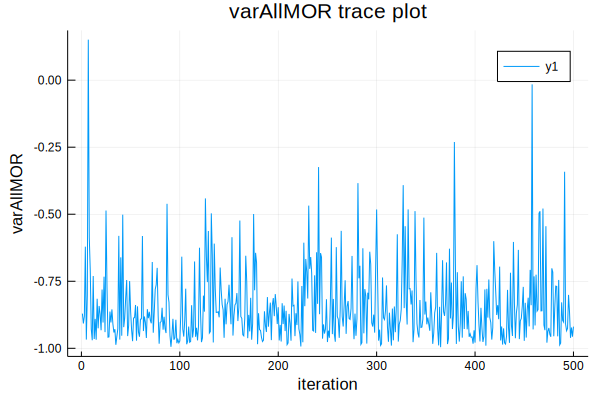

In [99]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "varAllMOR trace plot",
        xlabel = "iteration", ylabel = "varAllMOR")

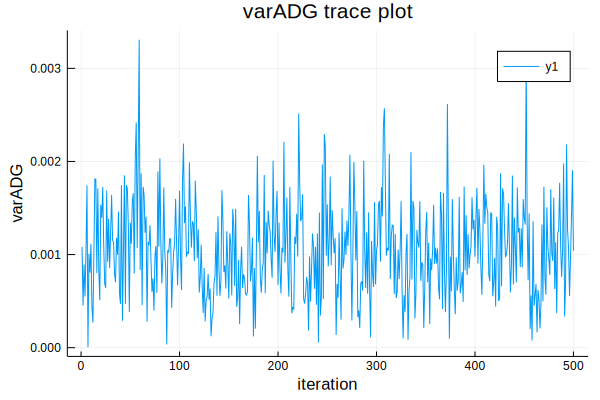

In [100]:
using Plots
x = out[!,1]; y = out[!,3]; # These are the plotting data
plot(x,y, title = "varADG trace plot",
        xlabel = "iteration", ylabel = "varADG")

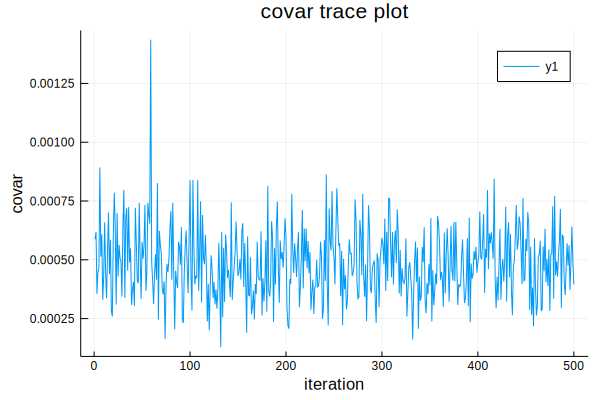

In [101]:
using Plots
x = out[!,1]; y = out[!,4]; # These are the plotting data
plot(x,y, title = "covar trace plot",
        xlabel = "iteration", ylabel = "covar")

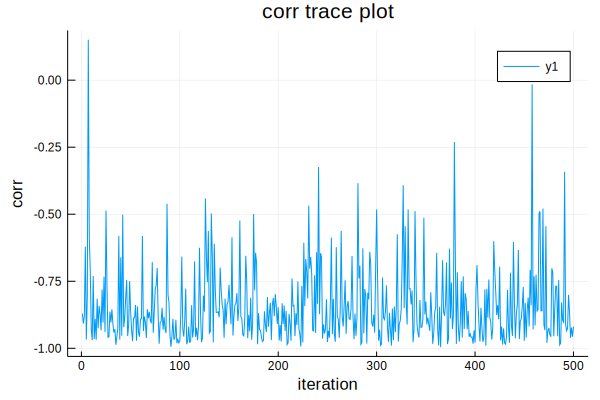

In [102]:
using Plots
x = out[!,1]; y = out[!,2]; # These are the plotting data
plot(x,y, title = "corr trace plot",
        xlabel = "iteration", ylabel = "corr")

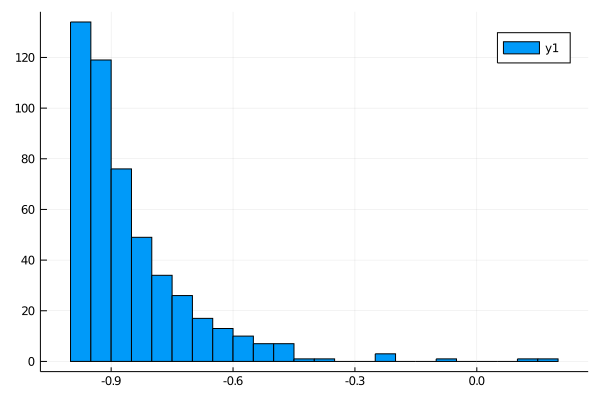

In [20]:
h = histogram(out[!,2])
display(h)

## Whole genome genetic correlation

In [3]:
gVar= CSV.read("MCMC_BayesB_genetic_variance.txt")

,Nur2ADG_Nur2ADG,Nur2ADG_Died_Adj,Died_Adj_Nur2ADG,Died_Adj_Died_Adj
,Float64,Float64,Float64,Float64
1,0.00381629,-0.00244607,-0.00244607,0.0115176
2,0.00339584,-0.00290159,-0.00290159,0.0125662
3,0.00383148,-0.00185484,-0.00185484,0.0137184
4,0.00339826,-0.00297037,-0.00297037,0.0126823
5,0.00357881,-0.00319839,-0.00319839,0.0139323
6,0.00378953,-0.00291914,-0.00291914,0.0115618
7,0.00377914,-0.002375,-0.002375,0.0116711
8,0.00389362,-0.00366631,-0.00366631,0.0146892
9,0.00302831,-0.00258519,-0.00258519,0.0134973


In [4]:
sqVar1=[sqrt(i) for i in gVar[!,:Nur2ADG_Nur2ADG]] 
sqVar2=[sqrt(i) for i in gVar[!,:Died_Adj_Died_Adj]] 
Product= sqVar1 .* sqVar2
rg= gVar[!,:Nur2ADG_Died_Adj] ./ Product  # Genetic correlations
insertcols!(gVar, 2, :corr => rg)

,Nur2ADG_Nur2ADG,corr,Nur2ADG_Died_Adj,Died_Adj_Nur2ADG,Died_Adj_Died_Adj
,Float64,Float64,Float64,Float64,Float64
1,0.00381629,-0.368949,-0.00244607,-0.00244607,0.0115176
2,0.00339584,-0.444183,-0.00290159,-0.00290159,0.0125662
3,0.00383148,-0.255843,-0.00185484,-0.00185484,0.0137184
4,0.00339826,-0.452464,-0.00297037,-0.00297037,0.0126823
5,0.00357881,-0.452951,-0.00319839,-0.00319839,0.0139323
6,0.00378953,-0.44101,-0.00291914,-0.00291914,0.0115618
7,0.00377914,-0.357611,-0.002375,-0.002375,0.0116711
8,0.00389362,-0.484791,-0.00366631,-0.00366631,0.0146892
9,0.00302831,-0.404362,-0.00258519,-0.00258519,0.0134973


In [5]:
#using Pkg
#Pkg.add("StatsBase")
#using(StatsBase)
mean(gVar[!,2])

-0.4314839110293475

In [6]:
using Statistics
std(gVar[!,:corr])

0.05625918957599822

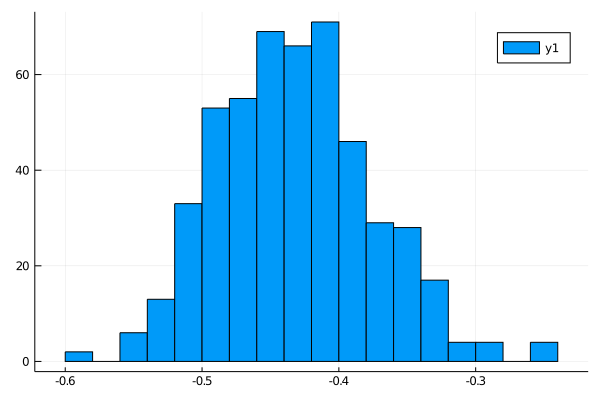

In [7]:
h = histogram(gVar[!,2])
display(h)

## BV correlation for SSC3 region from MCMC BayesB samples

In [3]:
SNP_Effect_ADG= readdlm("MCMC_BayesB_marker_effects_Nur2ADG.txt", ',',header=false)
SNP_Effect_ADG= SNP_Effect_ADG[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_ADG_MHC= SNP_Effect_ADG[:, 102313:103184]  # obtained from Map info
# Get genotypes for MHC region
M_MHC= M[:, 102313:103184]
M_MHC'
BV_ADG_MHC= Effect_ADG_MHC * M_MHC'
var_ADG= vec(var(BV_ADG_MHC, dims=2))  # Get var for each iteration

# Get var for AllTRT
SNP_Effect_AllTRT= readdlm("MCMC_BayesB_marker_effects_Died_Adj.txt", ',',header=false)
SNP_Effect_AllTRT= SNP_Effect_AllTRT[2:451,:]
# Get marker effects for MHC region 20 to 30mb
Effect_AllTRT_MHC= SNP_Effect_AllTRT[:, 102313:103184]
BV_AllTRT_MHC= Effect_AllTRT_MHC * M_MHC'
var_AllTRT= vec(var(BV_AllTRT_MHC, dims=2)) # Get var for each iteration

coVar = Array{Float64,1}()
for i=1:450
    adg= BV_ADG_MHC[i,:]
    AllTRT= BV_AllTRT_MHC[i,:]
    covi=cov(adg, AllTRT)
    push!(coVar,covi)
end
coVar

out=DataFrame(covar=coVar)
insertcols!(out, 1, :var_ADG => var_ADG)
insertcols!(out, 1, :var_AllTRT => var_AllTRT)
insertcols!(out, 1, :iteration => 1:450) # Add a column called iteration

# genetic correlation
Product= out[!,:var_AllTRT] .* out[!,:var_ADG]  # product of vars
sqVar=[sqrt(i) for i in Product]  # get sqrt for whole vector
rg= out[!,:covar] ./ sqVar[:,]  # Genetic correlations
insertcols!(out, 2, :corr => rg)

,iteration,corr,var_AllTRT,var_ADG,covar
,Int64,Float64,Float64,Float64,Float64
1,1,-0.977564,0.000165993,3.68256e-5,-7.64302e-5
2,2,-0.394519,5.97914e-6,5.61838e-5,-7.23091e-6
3,3,-0.55419,0.000183293,1.94762e-5,-3.31119e-5
4,4,0.989264,1.98402e-5,4.7471e-5,3.03598e-5
5,5,0.0921052,6.82283e-6,0.000102356,2.43402e-6
6,6,-0.936597,0.000100783,2.79849e-5,-4.97403e-5
7,7,-0.901969,0.000228401,0.000130671,-0.000155823
8,8,-0.990301,8.22717e-5,0.000151166,-0.000110438
9,9,-0.591605,4.65811e-5,6.08475e-5,-3.14962e-5


In [4]:
out= filter(row -> ! isnan(row.corr), out)
mean(out[!,:corr])

-0.6669972465105322

In [5]:
using Statistics
std(out[!,:corr])

0.4169132728748066

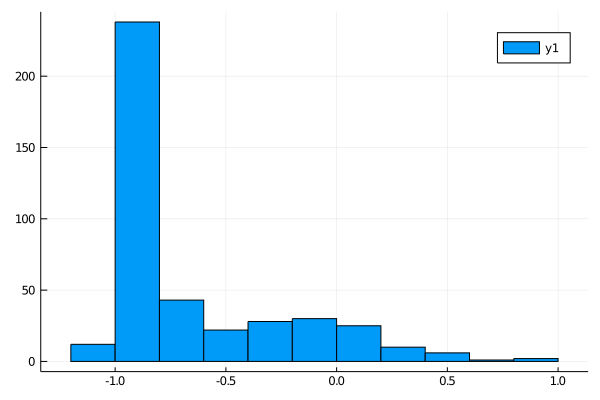

In [6]:
using Plots
h = histogram(out[!,:corr])
display(h)